In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [32]:
from src.components.data_ingestion import DataIngestion
from src.components.data_transformation import DataTransformation
from sklearn.metrics import precision_recall_curve,recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier


In [4]:
obj=DataIngestion()
train_data,test_data=obj.initiate_data_ingestion()

data_transformation=DataTransformation()
train_arr,test_arr,_=data_transformation.initiate_data_transformation(train_data,test_data)



In [13]:
X_train,y_train,X_test,y_test=(train_arr[:,:-1],train_arr[:,-1],test_arr[:,:-1],test_arr[:,-1])

In [27]:
sgd_class = SGDClassifier(loss='log_loss',random_state=42)

In [28]:
def plot_precision_recall(model,y_train,X_train):
    y_scores = cross_val_predict(model,X_train,y_train,cv=3,method='decision_function')
    precions,recalls,thresholds = precision_recall_curve(y_train,y_scores)
    plt.plot(thresholds,precions[:-1],'b--',label='precision',linewidth=2)
    plt.plot(thresholds,recalls[:-1],'g-',label='recall',linewidth=2)
    plt.show()
    return y_scores

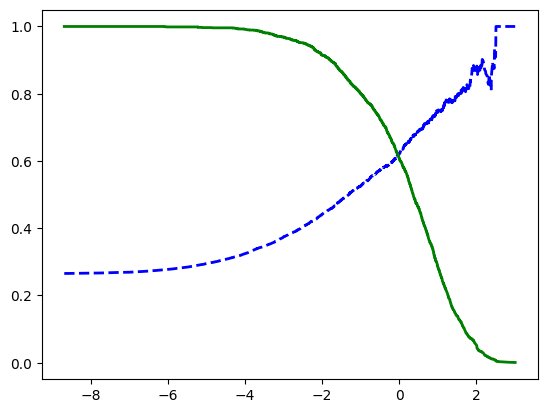

In [29]:
y_scores = plot_precision_recall(sgd_class,y_train=y_train,X_train=X_train)

In [30]:
# Predict probabilities for the test set
y_train_pred_threshold = (y_scores >= -2)

# Apply the threshold to convert probabilities to class predictions
# y_predictions = (y_probabilities > threshold).astype(int)

In [33]:
recall_score(y_train,y_train_pred_threshold)

0.9150501672240803

In [ ]:
#inference pipeline logic
# train model, find threshold for recall 90 percent use this threshold at inference stage